# Julia seems a lot like  Matlab, at first

but look for hints of greater depth
  * richer numerical type system
  * Unicode variables and source text
  * better function-definition syntax
  * metaprogramming: transforming then evaluating chunks of code

## Solving Ax=b with backslash operator

In [1]:
A = randn(4,4)
x = rand(4)
b = A*x
x̂ = A\b

4-element Array{Float64,1}:
 0.375733
 0.833437
 0.151503
 0.181703

In [2]:
norm(A*x̂ - b)

1.2412670766236366e-16

In [3]:
@show norm(A*x̂ - b)

norm(A * x̂ - b) = 1.2412670766236366e-16


1.2412670766236366e-16

## Calculate singular value decomposition (SVD)

Singular value decomposition is the factorization of matrix $A$ into
$A = U \Sigma V'$ where $U$ and $V$ are orthogonal and $\Sigma$ is diagonal.

In [4]:
U,Σ,V = svd(A);

In [5]:
U

4×4 Array{Float64,2}:
  0.0723957  -0.992287    0.0894702  -0.0460384
  0.611252   -0.0154524  -0.766695   -0.195732 
 -0.274171    0.0269431   0.0261953  -0.960946 
 -0.738891   -0.120004   -0.635206    0.190136 

In [6]:
U'*U

4×4 Array{Float64,2}:
 1.0           2.83184e-16  6.12837e-16   1.45521e-16
 2.83184e-16   1.0          1.71723e-17  -3.87802e-17
 6.12837e-16   1.71723e-17  1.0           2.2889e-17 
 1.45521e-16  -3.87802e-17  2.2889e-17    1.0        

In [7]:
norm(U'*U - I)

1.2745336123576895e-15

In [8]:
norm(U*Σ*V' - A)

LoadError: DimensionMismatch("A has dimensions (4,1) but B has dimensions (4,4)")

In [ ]:
U[:,1]

In [ ]:
# demonstrate how to type and show Σ
@show Σ

In [9]:
err = norm(U*diagm(Σ)*V'-A)

1.865567703344711e-15

In [ ]:
typeof(err)

## Calculate eigenvalues of a symmetric matrix

In [ ]:
A = randn(4,4) |> t -> t + t'  # pipe A through map A -> A + A' to symmetrize it
λ = eigmax(A);
@show det(A - λ*I)             # metaprogramming: print expression then evaluate it
;

In [ ]:
typeof(I)

## Integrate Lorenz equations

In [10]:
using ODE
using PyPlot

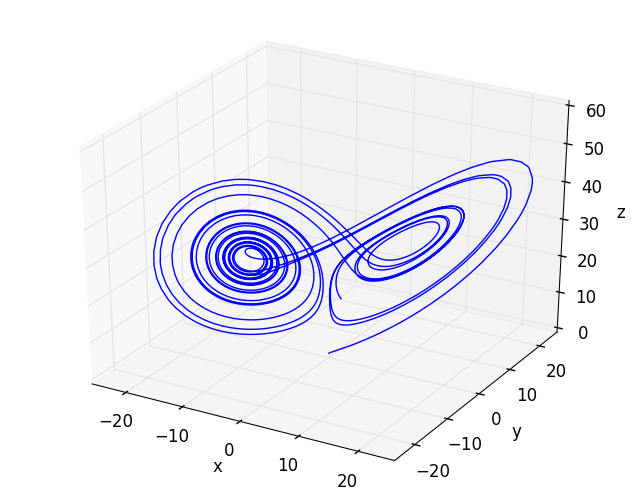

In [12]:
# define Lorenz equations
function f(t, x)
    σ = 10
    β = 8/3
    ρ = 28
    [σ*(x[2]-x[1]); x[1]*(ρ-x[3]); x[1]*x[2] - β*x[3]]
end

# run f once
f(0, [0; 0; 0])

# integrate 
t = 0:0.01:20.0
x₀ = [0.1; 0.0; 0.0]
t,x = ode45(f, x₀, t)

x = hcat(x...)'         # rearrange storage of x (don't ask...)

# plot
plot3D(x[:,1], x[:,2], x[:,3], "b-")
xlabel("x")
ylabel("y")
zlabel("z")
xlim(-25,25)
ylim(-25,25)
zlim(0,60)
;

## Fibonnaci function

In [ ]:
f(n) = n < 2 ? 1 : f(n-1) + f(n-2)  # recursive function definition
for i = 0:10
    println("f($i) = $(f(i))")      # string interpolation
end